## Выполнил задание Омаров Руслан
Идея для решения [задачи](https://www.dropbox.com/s/0n1feahxmhsviba/keentools_task_summer_2020.pdf): любая окружность как кривая второго порядка однозначно задается тремя точками. Таким образом, если мы произвольно выберем из всех тех точек, которые пришли на вход, хотя бы 5 из них (рассмотрим при M = 3), то по принципу Дирихле получим, что как минимум одна тройка из этих 5 точек будет задавать одну из искомых окружностей. Мы можем составить уравнение окружности по этим 3 точкам и пройтись по всем точкам и проверить лежат ли эти точки на окружности. Далее процедуру можно продолжить рекурсивно, зная, что уже остались точки только с 2 окружностей. 

In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt
import itertools
from collections import Counter



plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [8., 5.]

Сгенерируем тестовые данные для задачи.

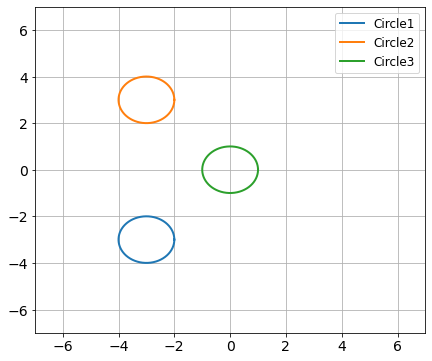

In [2]:
num_samples = 3333

theta = np.linspace(0, 2 * np.pi, num_samples)
a1, b1 = 1 * np.cos(theta), 1 * np.sin(theta)
a2, b2 = 1 * np.cos(theta), 1 * np.sin(theta)
a3, b3 = 1 * np.cos(theta), 1 * np.sin(theta)

a1 = a1 - 3
b1 = b1 - 3

a2 = a2 - 3
b2 = b2 + 3


plt.figure(figsize=(7,6))
plt.plot(a1, b1, linestyle='-', linewidth=2, label='Circle1')
plt.plot(a2, b2, linestyle='-', linewidth=2, label='Circle2')
plt.plot(a3, b3, linestyle='-', linewidth=2, label='Circle3')

plt.ylim([-7,7])
plt.xlim([-7,7])
plt.grid()
plt.legend(loc='upper right')
plt.show(block=True)

Далее идут функции для построения уравнения окружности (точнее, для получения центра и радиуса) и для проверки принадлежит ли точка окружности.

In [3]:
def get_circle(p1, p2, p3):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    b = (x1 ** 2 + y1 ** 2) * (y2 - y3) + (x2 ** 2 + y2 ** 2) * (y3 - y1) + (x3 ** 2 + y3 ** 2) * (y1 - y2)
    c = (x1 ** 2 + y1 ** 2) * (x3 - x2) + (x2 ** 2 + y2 ** 2) * (x1 - x3) + (x3 ** 2 + y3 ** 2) * (x2 - x1)
    a = x1 * (y2 - y3) - y1 * (x2 - x3) + x2 * y3 - x3 * y2
    
    x = b / (2 * a)
    y = c / (2 * a)
    
    r2 = (x - x2) ** 2 + (y - y2) ** 2
    return x, y, r2


def check_if_on_circle(a, b, r2, x, y):
    return abs((x - a) ** 2 + (y - b) ** 2 - r2)

Сама рекурсивная функция для решения задачи.

In [65]:
def solve(ls, ans, num):
    res = all(ans)
    if res:
        return res, ans
    five_points = []
    for i in range(len(ans)):
        if ans[i] is None:
            five_points.append(ls[i])
        if len(five_points) == 5:
            break
    for comb in itertools.combinations(five_points, 3):
        a, b, r2 = get_circle(*comb)
        for i in range(len(ls)):
            if abs(check_if_on_circle(a, b, r2, ls[i][0], ls[i][1])) < 1e-2:
                ans[i] = num
        res, arr = solve(ls, ans[:], num + 1)
        if res:
            return res, arr
    

Код, который считвает данные и выводит ответ в рамках условия задачи.

In [66]:
n, m = list(map(int, input().split()))
ls = []
for i in range(n):
    x, y = list(map(float, input().split()))
    ls.append((x, y))

if len(ls) <= 3 or m == 1:
    for i in range(n):
        print(1)
else:
    arr = [(None, float("inf")) for _ in range(n)]
    _, ans = solve(ls, arr, 1)
    ans = [num for num, _ in ans]
    d = {key: val for val, key in enumerate(Counter(ans).keys(), 1)}
    for i in range(n):
        ans[i] = d[ans[i]]

    for item in ans:
        print(item)


3 1
0 0
0 1
1 0
1
1
1


### Тесты
Возьмем те данные, которые использовали для построения иллюстрации. Тесты проведены при максимальных возможных $N$ и при разичных $M$. Также, рассмотрены разные взаимные положения окружностей.

В тестах могут получаться странные номера окружностей, но эта особенность учтена в ячейке выше.

### Test 1

Две из 3 окружностей близко расположены

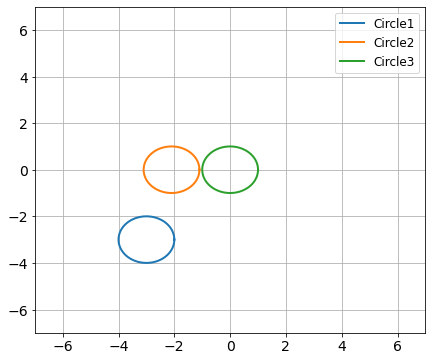

In [67]:
num_samples = 3333

theta = np.linspace(0, 2 * np.pi, num_samples)
a1, b1 = 1 * np.cos(theta), 1 * np.sin(theta)
a2, b2 = 1 * np.cos(theta), 1 * np.sin(theta)
a3, b3 = 1 * np.cos(theta), 1 * np.sin(theta)

a1 = a1 - 3
b1 = b1 - 3

a2 = a2 - 2.1


plt.figure(figsize=(7,6))
plt.plot(a1, b1, linestyle='-', linewidth=2, label='Circle1')
plt.plot(a2, b2, linestyle='-', linewidth=2, label='Circle2')
plt.plot(a3, b3, linestyle='-', linewidth=2, label='Circle3')

plt.ylim([-7,7])
plt.xlim([-7,7])
plt.grid()
plt.legend(loc='upper right')
plt.show(block=True)

In [71]:
ls = []
for x, y in zip(a1, b1):
    ls.append(((x, y), 1))

for x, y in zip(a2, b2):
    ls.append(((x, y), 2))

for x, y in zip(a3, b3):
    ls.append(((x, y), 3))

ans = [None for _ in range(len(ls))]
random.shuffle(ls)
inp_arr = [item for item, i in ls]
_, res = solve(inp_arr, ans, 1)
cc = Counter(res)
cc

Counter({4: 3333, 11: 3333, 12: 3333})

In [72]:
d = {key: val for val, key in enumerate(Counter(res).keys(), 1)}
for i in range(len(ls)):
    res[i] = d[res[i]]

assert len(Counter([(res[i], ls[i][1]) for i in range(len(ls))]).keys()) == 3

### Test 2

Все 3 окружности далеко

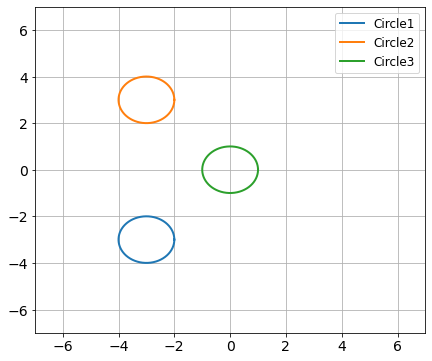

In [73]:
num_samples = 3333

theta = np.linspace(0, 2 * np.pi, num_samples)
a1, b1 = 1 * np.cos(theta), 1 * np.sin(theta)
a2, b2 = 1 * np.cos(theta), 1 * np.sin(theta)
a3, b3 = 1 * np.cos(theta), 1 * np.sin(theta)

a1 = a1 - 3
b1 = b1 - 3

a2 = a2 - 3
b2 = b2 + 3


plt.figure(figsize=(7,6))
plt.plot(a1, b1, linestyle='-', linewidth=2, label='Circle1')
plt.plot(a2, b2, linestyle='-', linewidth=2, label='Circle2')
plt.plot(a3, b3, linestyle='-', linewidth=2, label='Circle3')

plt.ylim([-7,7])
plt.xlim([-7,7])
plt.grid()
plt.legend(loc='upper right')
plt.show(block=True)

In [75]:
ls = []
for x, y in zip(a1, b1):
    ls.append(((x, y), 1))

for x, y in zip(a2, b2):
    ls.append(((x, y), 2))

for x, y in zip(a3, b3):
    ls.append(((x, y), 3))

ans = [None for _ in range(len(ls))]
random.shuffle(ls)
inp_arr = [item for item, i in ls]
_, res = solve(inp_arr, ans, 1)
cc = Counter(res)
cc

Counter({4: 3333, 8: 3333, 7: 3333})

In [76]:
d = {key: val for val, key in enumerate(Counter(res).keys(), 1)}
for i in range(len(ls)):
    res[i] = d[res[i]]

assert len(Counter([(res[i], ls[i][1]) for i in range(len(ls))]).keys()) == 3

### Test 3
Две близкие окружности


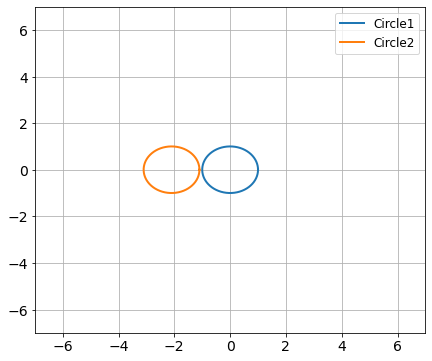

In [77]:
num_samples = 5000

theta = np.linspace(0, 2 * np.pi, num_samples)
a1, b1 = 1 * np.cos(theta), 1 * np.sin(theta)
a2, b2 = 1 * np.cos(theta), 1 * np.sin(theta)


a2 = a2 - 2.1



plt.figure(figsize=(7,6))
plt.plot(a1, b1, linestyle='-', linewidth=2, label='Circle1')
plt.plot(a2, b2, linestyle='-', linewidth=2, label='Circle2')

plt.ylim([-7,7])
plt.xlim([-7,7])
plt.grid()
plt.legend(loc='upper right')
plt.show(block=True)

In [78]:
ls = []
for x, y in zip(a1, b1):
    ls.append(((x, y), 1))

for x, y in zip(a2, b2):
    ls.append(((x, y), 2))

ans = [None for _ in range(len(ls))]
random.shuffle(ls)
inp_arr = [item for item, i in ls]
_, res = solve(inp_arr, ans, 1)
cc = Counter(res)
cc

Counter({6: 5000, 7: 5000})

In [79]:
d = {key: val for val, key in enumerate(Counter(res).keys(), 1)}
for i in range(len(ls)):
    res[i] = d[res[i]]

assert len(Counter([(res[i], ls[i][1]) for i in range(len(ls))]).keys()) == 2